In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#dataset has 13 data categories - age, sex, chest pain, rest bp, cholesterol, etc. 
#last data category is the predicted attribute (0 for no heart disease, 1 for disease)

dataset = pd.read_csv('heart.csv') #reads and converts into dataframe
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     63    1   3       145   233    1        0      150      0      2.3  \
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [16]:
#Check to see if there is any missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: xlabel='oldpeak', ylabel='Count'>

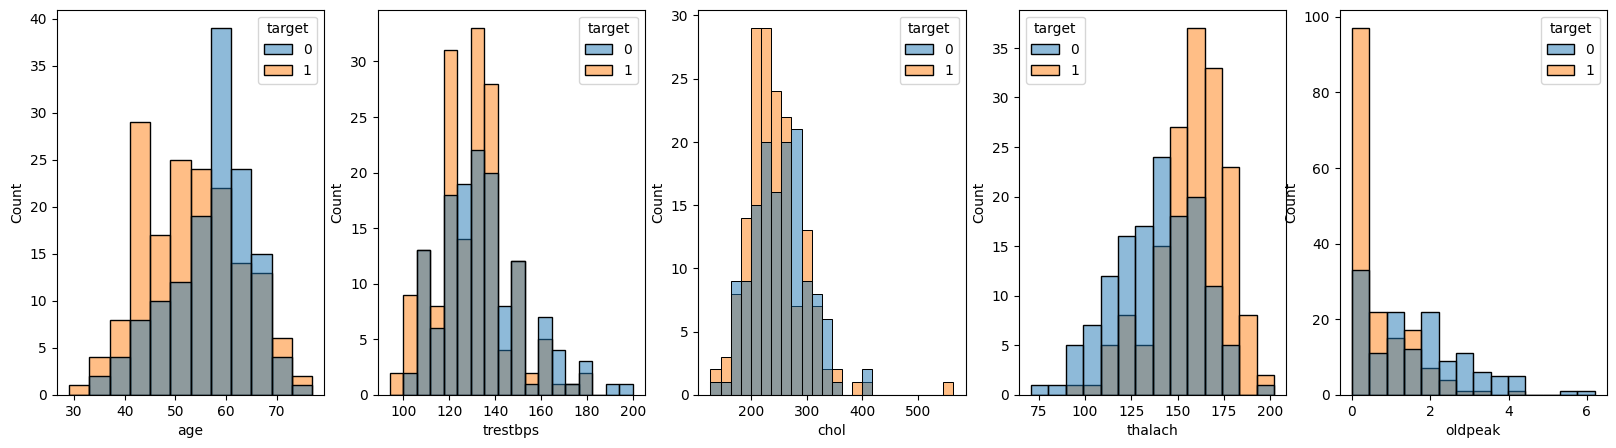

In [29]:
#Relationship bewteen each quantitative variable and heart disease presence 
fig, axes = plt.subplots(1, 5, figsize=(20,5))
sns.histplot(ax=axes[0], data=dataset, x="age", hue="target") #1 means heart disease 
sns.histplot(ax=axes[1], data=dataset, x="trestbps", hue="target")
sns.histplot(ax=axes[2], data=dataset, x="chol", hue="target")
sns.histplot(ax=axes[3], data=dataset, x="thalach", hue="target")
sns.histplot(ax=axes[4], data=dataset, x="oldpeak", hue="target")

In [30]:
#Encode the categorical data - CP (Type 1-4), RestECG (3 values), Thal (3 defects)
encoded_data = pd.get_dummies(dataset, columns=['cp','restecg','thal'], dtype=int)
encoded_data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,...,1,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,...,1,0,0,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,0,0,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,1,0,...,0,0,1,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,2,...,0,0,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,...,0,0,0,0,1,0,0,0,0,1


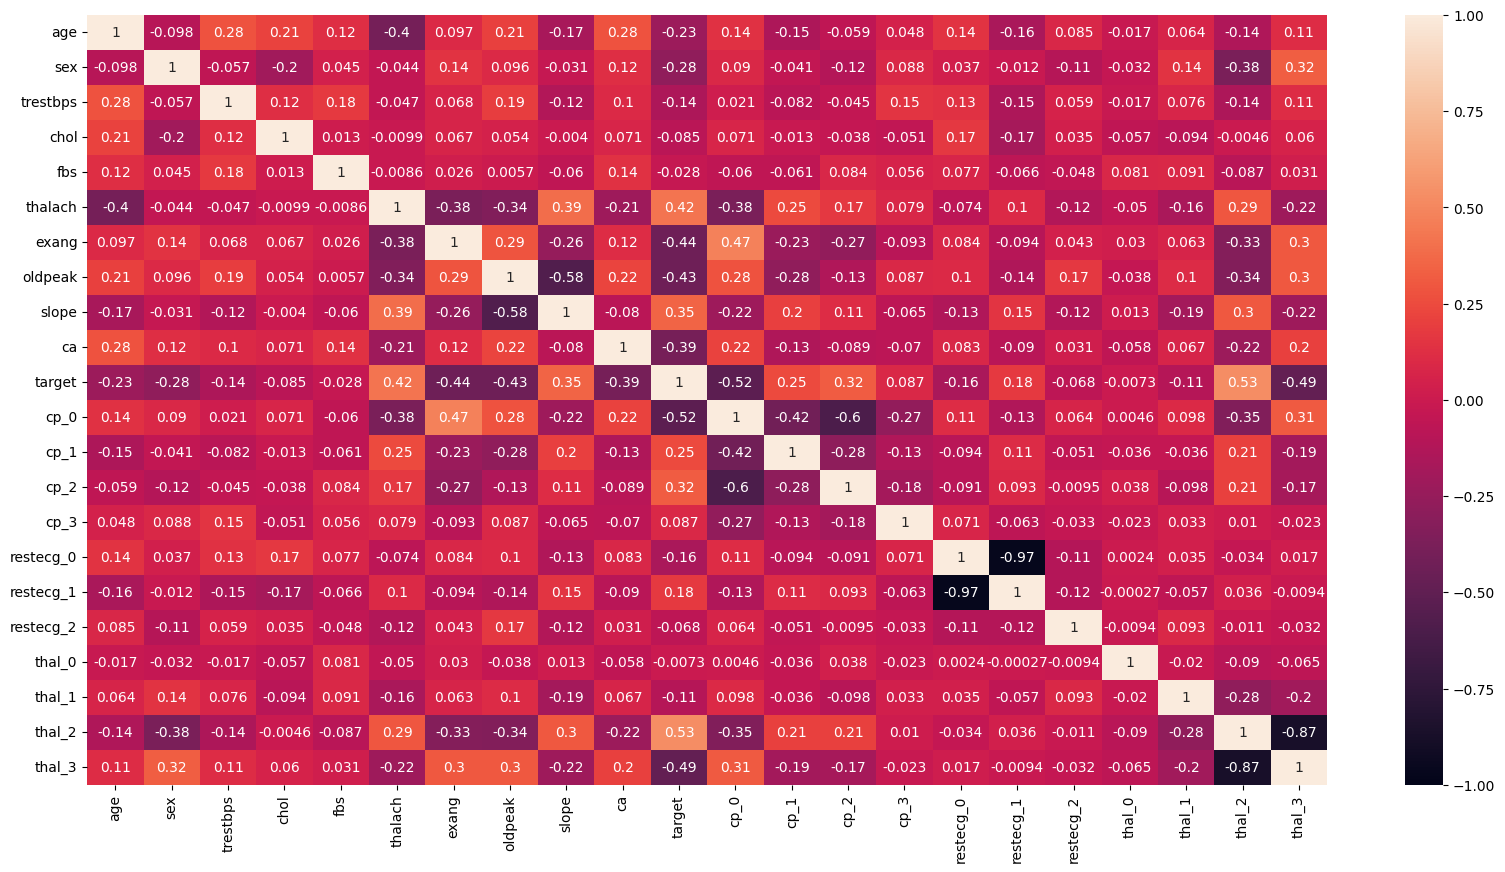

In [31]:
df = pd.DataFrame(encoded_data)

#Correlation matrix = direction and strenght of relationship between two variables (-1 to 1)
df_corr_matrix = df.corr()
df_corr_matrix

#Visual representation of correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(df_corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

In [35]:
#Remove the target value variable - split into X and Y groups
predictors = df.drop(columns=['target'])
outcomes = df['target']

Accuracy:  89.47368421052632


<Axes: >

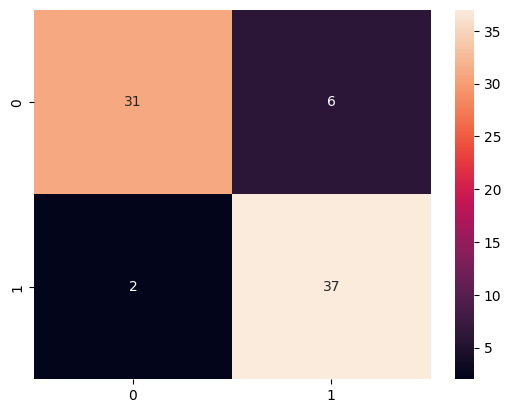

In [76]:
#Logistic Regression Classification Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, outcomes, test_size=0.25)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=5000) #high number of iterations to combat convergence
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#Logistic Regression Model Analysis
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", (accuracy*100))
logreg_conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(logreg_conf_matrix, annot=True)

Accuracy:  86.8421052631579


<Axes: >

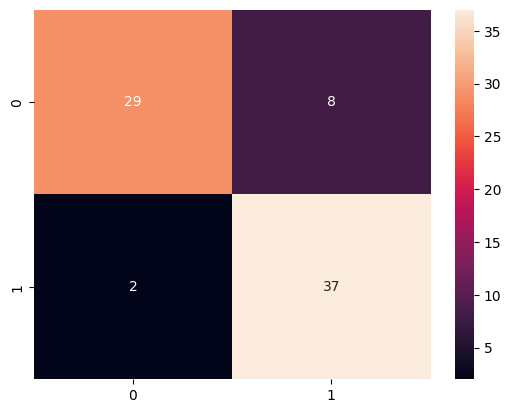

In [77]:
#Logistic Regression with Normalized Training and Test Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_normalize = scaler.fit_transform(X_train)
X_test_normalize = scaler.fit_transform(X_test)

logreg = LogisticRegression(solver='lbfgs', max_iter=5000) #high number of iterations to combat convergence
logreg.fit(X_train_normalize, y_train)
y_pred = logreg.predict(X_test_normalize)

accuracy_normalize = accuracy_score(y_test, y_pred)
print("Accuracy: ", (accuracy_normalize*100))
logreg_conf_matrix_normalize = confusion_matrix(y_test, y_pred)
sns.heatmap(logreg_conf_matrix_normalize, annot=True)

Accuracy:  89.47368421052632


<Axes: >

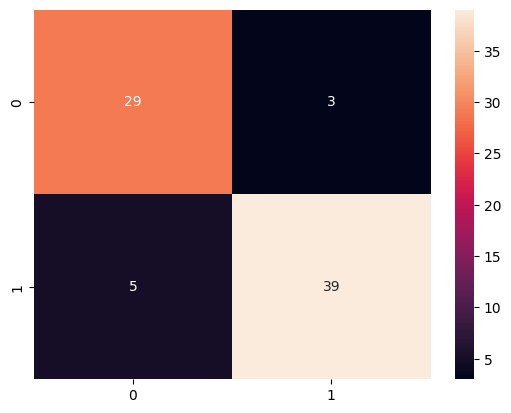

In [88]:
#Naive Bayes Classification Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(predictors, outcomes, test_size=0.25)

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)
y_pred_nb = nb_model.predict(X_test_nb)

#NB Model Analysis
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy: ", (accuracy*100))
nb_conf_matrix = confusion_matrix(y_test_nb, y_pred_nb)
sns.heatmap(nb_conf_matrix, annot=True)

Accuracy:  85.52631578947368


<Axes: >

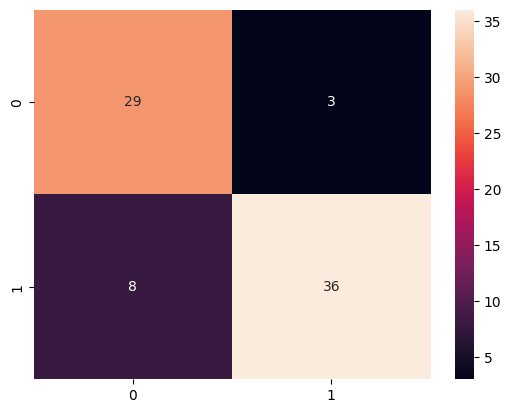

In [90]:
#Naive Bayes Normalized Model
X_train_normalize_nb = scaler.fit_transform(X_train_nb)
X_test_normalize_nb = scaler.fit_transform(X_test_nb)

nb_model = GaussianNB()
nb_model.fit(X_train_normalize_nb, y_train_nb)
y_pred_nb = nb_model.predict(X_test_normalize_nb)

#NB Model Analysis
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy: ", (accuracy*100))
nb_conf_matrix = confusion_matrix(y_test_nb, y_pred_nb)
sns.heatmap(nb_conf_matrix, annot=True)